PredictaStock: Predictive Stock Market Analysis

We have created a two-layer Keras Nerual Network that analyzes previous stock market data from the last 10 years of a specific stock. The model is trained on this data, and then applied to predict 2022 stock market information.

In [ ]:
!pip install yfinance
!pip install matplotlib
!pip install mplfinance
import numpy as np
import tensorflow as tf
import mplfinance as mpf

import yfinance as yf
from tensorflow import keras
from tensorflow.keras import layers, models

Training neural network on previous 10 years of data

In [2]:
def stock_weekly(stock: str) -> None:
    """Trained on Previous Ten Years of Data"""
    #Stock market information to train
    stock_data = yf.download(stock, start = '2010-01-01', end = '2020-01-01')

    #1 is stock increase 0 is stock decrease
    stock_data['Price_Up'] = np.where(stock_data['Close'].shift(-1) > stock_data['Close'], 1, 0)

    features = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']].values
    labels = stock_data['Price_Up'].values

    # 80% training, 20% testing split
    split_ratio = 0.80
    split_index = int(len(features) * split_ratio)

    #Input (features) Output (labels) data for training
    train_features = features[:split_index]
    train_labels = labels[:split_index]

    #Input (features) Output (labels) data for testing
    test_features = features[split_index:]
    test_labels = labels[split_index:]

    #Two layer Keras neural network
    model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(5,)),
    keras.layers.Dense(1, activation='sigmoid')
    ])

    #Complies data for training/testing
    model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
    model.fit(train_features, train_labels, epochs=30, batch_size=64)

    #Measures neural network predictions with real data
    test_loss, test_accuracy = model.evaluate(test_features, test_labels)
    weekly_data = stock_data.resample('W').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    })

    # Plot the weekly candlestick chart and volume
    mpf.plot(weekly_data, type='candle', volume=True, style='yahoo', title=f'Weekly Stock Price and Trading Volume for {stock}', ylabel='Price per share ($)')

    print(f'Test accuracy: {test_accuracy}')

Runs through epochs then displays a candlestick plot. The plot displays the price per share of the stock during the week and the associated trading volume. Green indicates an increase in the stock price, whereas red indicates a decrease in the stock price.

[*********************100%%**********************]  1 of 1 completed
Epoch 1/30
32/32 [==============================] - 1s 2ms/step - loss: 1443795.7500 - accuracy: 0.4841
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 84583.3438 - accuracy: 0.4851
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 24477.0000 - accuracy: 0.4990
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 18744.4336 - accuracy: 0.5298
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 11156.0713 - accuracy: 0.5159
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 14075.8652 - accuracy: 0.5010
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 33726.6484 - accuracy: 0.4851
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 54596.9062 - accuracy: 0.5020
Epoch 9/30
32/32 [==============================] - 0s 2ms/step - loss: 17054.8613 - accuracy: 0.5288
Epoch 10/30

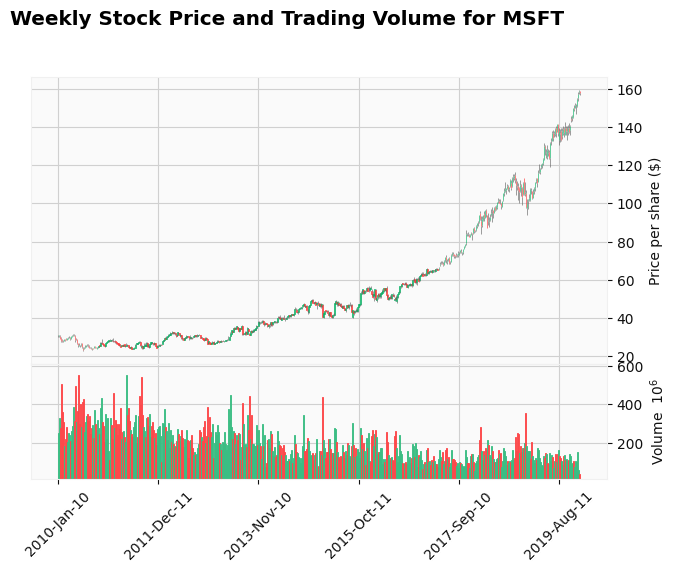

Test accuracy: 0.567460298538208


In [8]:
stock_weekly("MSFT")

Applies previously made model to predict the 2022 stock market data for a given stock. This displays a graph that maps the predicted price per share over the year. Green indicates a general increase, and red indicates a general decrease.

In [4]:
def predictions_2022(stock: str):
  #Sets end date for 2022 predictions
  start_date = '2022-01-01'
  end_date = '2022-12-31'

  stock_data_2022 = yf.download(stock, start=start_date, end=end_date)

  #Labels increase or decrease in stock price
  stock_data_2022['Price_Up'] = np.where(stock_data_2022['Close'].shift(-1) > stock_data_2022['Close'], 1, 0)
  features_2022 = stock_data_2022[['Open', 'High', 'Low', 'Close', 'Volume']].values

  #Trained two layer Keras neural network
  model = keras.Sequential([
  keras.layers.Dense(64, activation='relu', input_shape=(5,)),
  keras.layers.Dense(1, activation='sigmoid')
  ])
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  #Uses previous Keras neural network to predict 2022 output
  predictions_2022 = model.predict(features_2022)

  #Determines loss function and accuracy of our model
  test_loss_2022, test_accuracy_2022 = model.evaluate(features_2022, stock_data_2022['Price_Up'].values)

  #Creates plot of predicted price per share against the date
  mpf.plot(stock_data_2022, type='candle', style='yahoo', title=f'Predicted Stock 2022 Movement for {stock}', ylabel='Price per share ($)')

  print(f'Test accuracy on 2022 data: {test_accuracy_2022}')

Uses neural network to predict 2022 stock fluctuations. Measures accuracy of neural network to real data provided.

[*********************100%%**********************]  1 of 1 completed
8/8 [==============================] - 0s 3ms/step - loss: 787350.0000 - accuracy: 0.5418


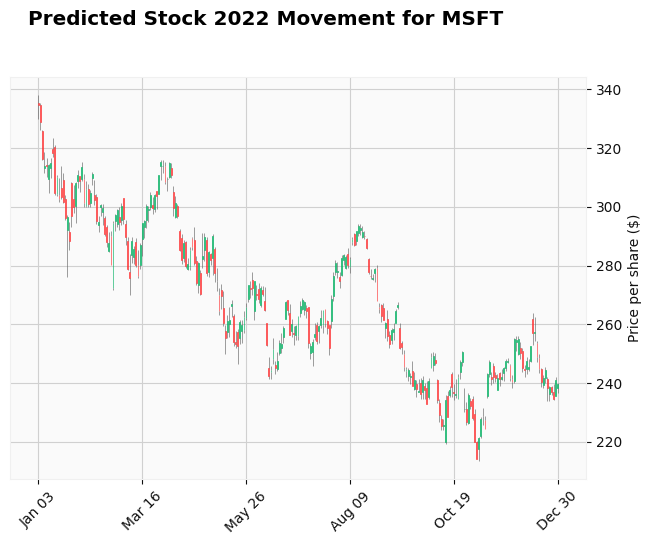

Test accuracy on 2022 data: 0.541832685470581


In [9]:
predictions_2022("MSFT")